<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import_libraries">Import Libraries</a></li>
        <li><a href="#import_dataset">Import "Pima Indians Diabetes" Dataset</a></li>
        <li><a href="#information">Information about the Dataset</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>        
        <li><a href="#feature_selection">Feature Selection</a></li>
        <li><a href="#classification">Classification</a></li>        
    </ol>
</div>
<br>
<hr>

<div id="import_libraries"> 
    <h2>Import Libraries</h2>    
</div>

In [1]:

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression  
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import LeaveOneOut

import warnings
warnings.filterwarnings("ignore")

<hr>
<div id="import_dataset"> 
    <h2>Import "Pima Indians Diabetes" Dataset</h2>         
</div>

**About the dataset :**
<ul>
       <li> The "<strong>Pima Indians Diabetes</strong>" dataset includes medical data for <strong>768 women</strong> of Pima Indian descent, aimed at predicting diabetes onset. It consists of features such as <strong>the number of pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, body mass index (BMI), diabetes pedigree function, and age</strong>. The target variable indicates whether an individual has <strong>diabetes (1) or not (0)</strong>. 
        <br>
        <br>
        <li> This dataset is commonly used in machine learning for developing <strong>predictive models and understanding diabetes risk factors</strong>.
        <br>
        <br>
        <li> By analyzing this dataset, researchers can identify <strong>significant predictors of diabetes, enhancing early detection and informing healthcare strategies for prevention and intervention in at-risk populations</strong>. 
</ul> 

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"  
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',  
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  
pid_df = pd.read_csv(url, header=None, names=column_names)
display(pid_df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<hr>
<div id="information"> 
    <h2>Information about the Dataset</h2>    
</div>

In [ ]:
# Show summary statistics for the dataset
# This includes count, mean, standard deviation, minimum, 25%, 50%, 75%, and maximum values for numeric columns
print('\nThe dataset description:\n')

data_describe = pid_df.describe()
display(data_describe)

In [ ]:
# Display a concise summary of the dataset
# This summary includes the index dtype, column dtypes, non-null values, and memory usage 
print('\nMore information about the dataset:\n')

data_information = pid_df.info()
display(data_information)

In [ ]:
# Get the shape of the dataset, which returns the number of rows and columns
shape_of_the_dataset = pid_df.shape
print("\nThe shape of the dataset -->", shape_of_the_dataset)

In [ ]:
# Calculate the number of unique values in each column of the dataset
print('\nNumber of unique data in the dataset:\n')

unique_data = pid_df.nunique()
print(unique_data)


<hr>
<div id="pre-processing"> 
    <h2>Pre-processing</h2>    
</div>
<div>
    <ol>
        <li><a href="#duplicates">Duplicate Tuples</a></li>
        <li><a href="#outliers">Detecting Outliers (Noise)</a></li>
        <li><a href="#missing_values">Handling Missing Values</a></li>
        <li><a href="#standardization">Standardization</a></li>
        <li><a href="#data_imbalance">Handling Data Imbalance</a></li>      
    </ol>
</div>
<br>

<hr>
<div id="duplicates"> 
    <h2>Duplicate Tuples</h2>    
</div>

In [3]:
# Calculate the number of duplicate rows in the dataframe
Num_of_duplicate_rows = pid_df.duplicated().sum()
print("\nThe number of duplicate rows -->", Num_of_duplicate_rows)


The number of duplicate rows --> 0


<hr>
<div id="outliers"> 
    <h2>Detecting Outliers (Noise)</h2>    
</div>
<div>
    <ol>
        <li><a href="#iqr">Interquartile Range (IQR) method</a></li>          
    </ol>
</div>
<br>

<div id="iqr"> 
    <h2>Interquartile Range (IQR) method</h2>    
</div>

In [4]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)  
Q1 = pid_df.quantile(0.25)  
Q3 = pid_df.quantile(0.75)  
IQR = Q3 - Q1  

# Define the outlier detection bounds  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

In [5]:
# Create a mask to filter out rows with outliers  
outlier_mask = ~((pid_df < lower_bound) |   
                 (pid_df > upper_bound)).any(axis=1)  

# Create a new dataframe after outlier detection and deleting
df_iqr = pid_df[outlier_mask]  
display(df_iqr)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Validate the IQR method
# Separate features and target variable  
x = df_iqr.drop('Outcome', axis=1)            # Features
y = df_iqr['Outcome']                         # Target variable

# Split the data into training and testing sets (80/20) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  

In [7]:
# Initialize the KNN classifier  
clf_iqr = KNeighborsClassifier(n_neighbors=1)  

# Perform cross-validation to check accuracy after IQR outlier removal  
accuracy = np.mean(cross_val_score(clf_iqr, x_train, y_train, scoring='accuracy', cv=10))  
print(f'\nCross-validated accuracy after IQR outlier removal: {accuracy:.4f}\n')


Cross-validated accuracy after IQR outlier removal: 0.6791



In [8]:
print("\nDataset shape before deleting the outliers -->", pid_df.shape)
print("\nDataset shape after deleting the outliers -->", df_iqr.shape)
print("\n")


Dataset shape before deleting the outliers --> (768, 9)

Dataset shape after deleting the outliers --> (639, 9)




<hr>
<div id="missing_values"> 
    <h2>Handling Missing Values</h2>    
</div>
<div>
    <ol>
        <li><a href="#mean">Mean Imputation</a></li>
        <li><a href="#iterative">Iterative Imputation</a></li>
        <li><a href="#knn">K-Nearest Neighbors (KNN) Imputation</a></li>     
        <li><a href="#output">Output the results</a></li>    
    </ol>
</div>
<br>

In [9]:
# Show summary statistics after detecting outliers
# This includes count, mean, standard deviation, minimum, 25%, 50%, 75%, and maximum values for numeric columns
print('\nThe data set description after detecting outliers:\n')
display(df_iqr.describe())


The data set description after detecting outliers:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


In [10]:
# Check for missing values in the dataframe
isna = pd.DataFrame(df_iqr.isna().sum(axis=0))
print(isna)

                          0
Pregnancies               0
Glucose                   0
BloodPressure             0
SkinThickness             0
Insulin                   0
BMI                       0
DiabetesPedigreeFunction  0
Age                       0
Outcome                   0


In [11]:
print('\nThere are no NaN values in the dataset \n')
print('\nBut according to the description, some variables cannot be zero. So they must be handled')
print('They are --> SkinThickness and Insulin \n')


There are no NaN values in the dataset 


But according to the description, some variables cannot be zero. So they must be handled
They are --> SkinThickness and Insulin 



In [12]:
# Replace zero values with NaN in specified columns 
temp= ['SkinThickness', 'Insulin']
df_iqr[temp]= df_iqr[temp].replace(0, np.nan)

# Check for missing values after replacement
isna= pd.DataFrame(df_iqr.isna().sum(axis=0))
print(isna)

                            0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness             179
Insulin                   307
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0


<div id="mean"> 
    <h2>Mean Imputation</h2>    
</div>

In [13]:
# Create a copy of the original dataframe for mean imputation  
DfMean = df_iqr.copy(deep=True)  

# Initialize the simpleimputer for mean imputation  
MeanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')  

In [14]:
# Apply mean imputation   
DfMean.iloc[:, :] = MeanImputer.fit_transform(DfMean)  

# Preview the data after mean imputation  
print('\nPreview the data after mean imputation: \n')
display(DfMean.head())


Preview the data after mean imputation: 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,126.89759,33.6,0.627,50,1
1,1,85,66,29.000000,126.89759,26.6,0.351,31,0
2,8,183,64,28.565217,126.89759,23.3,0.672,32,1
3,1,89,66,23.000000,94.00000,28.1,0.167,21,0
5,5,116,74,28.565217,126.89759,25.6,0.201,30,0


<div id="iterative"> 
    <h2>Iterative Imputation</h2>    
</div>

In [15]:
# Create a copy of the original dataset  
DfIterative = df_iqr.copy(deep=True)  

# Set up the iterative imputer
imputer_ite = IterativeImputer(missing_values=np.nan, sample_posterior=True, min_value=0,
                               random_state=42)

In [16]:
# Perfore the imputation
DfIterative.iloc[:, :] = imputer_ite.fit_transform(DfIterative)

# Preview the data after iterative imputation
print('\nPreview the data after iterative imputation: \n')
display(DfIterative.head())               


Preview the data after iterative imputation: 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,241.427854,33.6,0.627,50,1
1,1,85,66,29.000000,77.663658,26.6,0.351,31,0
2,8,183,64,21.316083,197.772724,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
5,5,116,74,21.837785,132.714637,25.6,0.201,30,0


<div id="knn"> 
		<h2>K-Nearest Neighbors (KNN) Imputation</h2>    
</div>

In [17]:
# Create a copy of the original dataset  
Df_knn = df_iqr.copy() 

# Initialize the KNN imputer  
imputer_knn = KNNImputer(n_neighbors=5)
# Fit the imputer and transform the dataset  
imputed_data_knn = imputer_knn.fit_transform(Df_knn)

In [18]:
# Convert back to dataframe  
Df_imputed_knn = pd.DataFrame(imputed_data_knn, columns=Df_knn.columns)

# Preview the data after KNN imputation
print('\nPreview the data after KNN imputation: \n')
display(Df_imputed_knn.head())


Preview the data after KNN imputation: 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,154.8,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.2,135.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,20.6,102.8,25.6,0.201,30.0,0.0


<div id="output"> 
    <h2>Output the results</h2>    
</div>

Compare the different Imputation Methods using **Kernel Density Estimation (KDE) Plots**

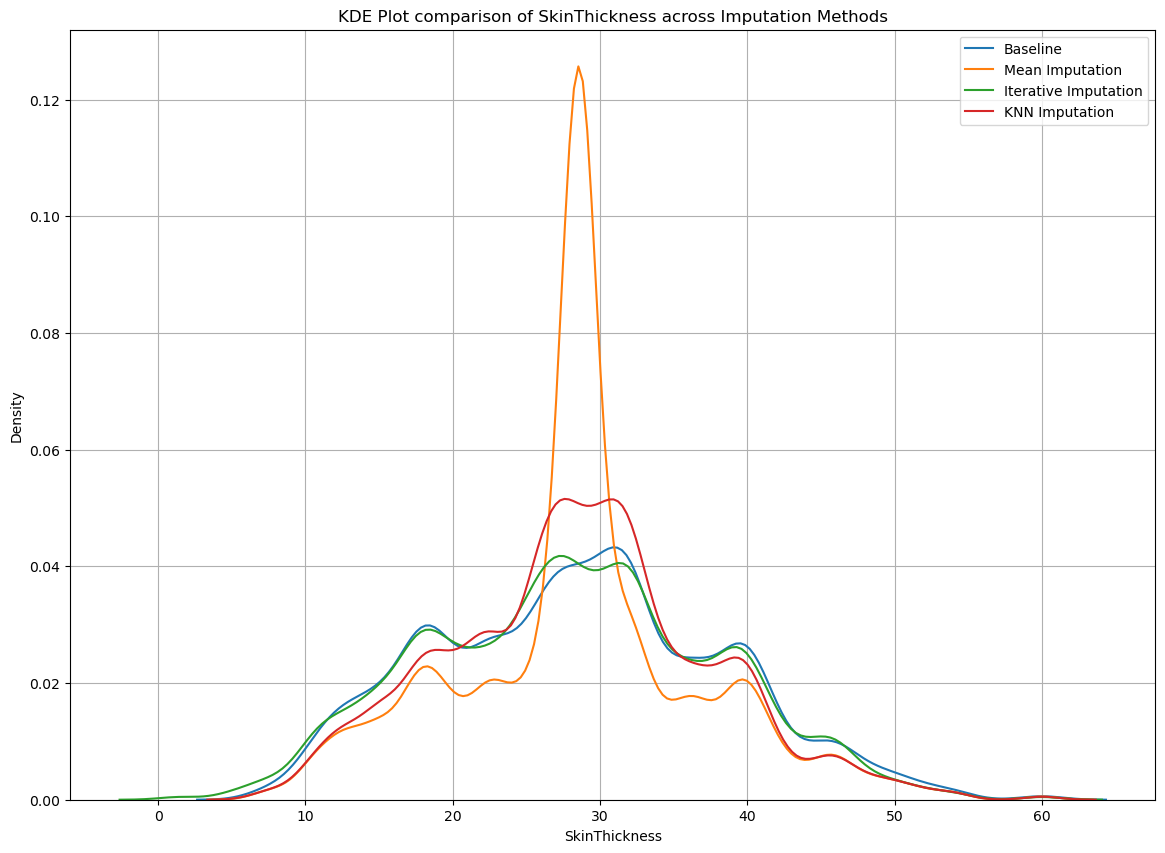

In [19]:
# 'SkinThickness' column
# Setup the plotting environment  
plt.figure(figsize=(14, 10))  

# KDE for 'SkinThickness' column  
sns.kdeplot(df_iqr['SkinThickness'], label='Baseline', fill=False, bw_adjust=0.5)  
sns.kdeplot(DfMean['SkinThickness'], label='Mean Imputation', fill=False, bw_adjust=0.5)  
sns.kdeplot(DfIterative['SkinThickness'], label='Iterative Imputation', fill=False, bw_adjust=0.5)
sns.kdeplot(Df_imputed_knn['SkinThickness'], label='KNN Imputation', fill=False, bw_adjust=0.5) 

# Aesthetic aspects of the plot  
plt.title('KDE Plot comparison of SkinThickness across Imputation Methods')  
plt.xlabel('SkinThickness')  
plt.ylabel('Density')  
plt.legend()  
plt.grid(True)  
plt.show()  

In [ ]:
# 'Insulin' column
# Setup the plotting environment  
plt.figure(figsize=(14, 10))  

# KDE for 'Insulin' column
sns.kdeplot(df_iqr['Insulin'], label='Baseline', fill=False, bw_adjust=0.5)  
sns.kdeplot(DfMean['Insulin'], label='Mean Imputation', fill=False, bw_adjust=0.5)     
sns.kdeplot(DfIterative['Insulin'], label='Iterative Imputation', fill=False, bw_adjust=0.5)
sns.kdeplot(Df_imputed_knn['Insulin'], label='KNN Imputation', fill=False, bw_adjust=0.5)

# Aesthetic aspects of the plot
plt.title('KDE Plot comparison of Insulin across Imputation Methods')  
plt.xlabel('Insulin')  
plt.ylabel('Density')  
plt.legend()  
plt.grid(True)  
plt.show()

In [20]:
print("\nContinue working with iterative imputation after comparing different imputation methods:\n")
display(DfIterative)


Continue working with iterative imputation after comparing different imputation methods:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,241.427854,33.6,0.627,50,1
1,1,85,66,29.000000,77.663658,26.6,0.351,31,0
2,8,183,64,21.316083,197.772724,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
5,5,116,74,21.837785,132.714637,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,225.650687,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,17.206246,219.718443,30.1,0.349,47,1


<hr>
<div id="standardization"> 
    <h2>Standardization</h2>    
</div>
<div>
    <ol>
        <li><a href="#z-score">Z-Score Standardization (Standard Scaling)</a></li>
        <li><a href="#min-max">Min-Max Scaling (Normalization)</a></li> 
        <li><a href="#output">Output the results</a></li>     
    </ol>
</div>
<br>

<div id="z-score"> 
    <h2>Z-Score Standardization (Standard Scaling)</h2>    
</div>

In [21]:
# Apply the Z-score standardization
Z_scaler = StandardScaler()  
Z_Scaled = Z_scaler.fit_transform(DfIterative)

# Create a new dataframe with the scaled data  
df_Z_Scaled = pd.DataFrame(Z_Scaled, columns = list(DfIterative.columns))

In [22]:
# Use all columns except 'Outcome'
df_Z_Scaled_final = df_Z_Scaled.drop('Outcome', axis = 1)

# Add the 'Outcome' column back to the dataframe
df_Z_Scaled_final['Outcome'] = DfIterative['Outcome'].tolist()
display(df_Z_Scaled_final.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.673824,0.991351,-0.010626,0.694306,1.653288,0.247974,0.788892,1.561132,1
1,-0.860651,-1.170674,-0.539736,0.088124,-0.768397,-0.840853,-0.311759,-0.154912,0
2,1.287615,2.192476,-0.716106,-0.688185,1.007732,-1.354158,0.968346,-0.064594,1
3,-0.860651,-1.033403,-0.539736,-0.518059,-0.526821,-0.607533,-1.045526,-1.058093,0
4,0.366929,-0.106820,0.165744,-0.635478,0.045677,-0.996400,-0.909939,-0.245230,0


In [23]:
# Validate the Z-score standardization
# Separate features and target variable  
x_z = df_Z_Scaled_final.drop('Outcome', axis = 1)               # Features
y_z = df_Z_Scaled_final['Outcome']                              # Target variable

# Split the data into training and testing sets (80/20)  
x_train_z, x_test_z, y_train_z, y_test_z = train_test_split(x_z, y_z, test_size=0.2, random_state=42)  

In [24]:
# Initialize the KNN classifier  
clf_z = KNeighborsClassifier(n_neighbors=10)  

# Perform cross-validation to check accuracy after the Z-standard scaling  
accuracy_z = np.mean(cross_val_score(clf_z, x_train_z, y_train_z, scoring='accuracy', cv=10)) 
print(f'\nCross-validated accuracy after the Z-standard scaling: {accuracy_z:.4f}\n')


Cross-validated accuracy after the Z-standard scaling: 0.7573



<div id="min-max"> 
    <h2>Min-Max Scaling (Normalization)</h2>    
</div>

In [25]:
# Apply Min Max scaler
MM_scaler = MinMaxScaler()
Min_Max_Scaled = MM_scaler.fit_transform(DfIterative)

# Create a new dataframe with the scaled data 
df_Min_Max_Scaled_final = pd.DataFrame(Min_Max_Scaled, columns = list(DfIterative.columns))
display(df_Min_Max_Scaled_final.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.675325,0.500000,0.572922,0.753171,0.484277,0.493261,0.644444,1.0
1,0.076923,0.266234,0.411765,0.470423,0.242123,0.264151,0.245283,0.222222,0.0
2,0.615385,0.902597,0.382353,0.339158,0.616939,0.160377,0.533693,0.244444,1.0
3,0.076923,0.292208,0.411765,0.367925,0.293102,0.311321,0.079964,0.000000,0.0
4,0.384615,0.467532,0.529412,0.348070,0.413917,0.232704,0.110512,0.200000,0.0


In [26]:
# Validate the Min Max Scaler
# Separate features and target variable  
x_mm = df_Min_Max_Scaled_final.drop('Outcome', axis = 1)            # Features
y_mm = df_Min_Max_Scaled_final['Outcome']                           # Target variable

# Split the data into training and testing sets (80/20) 
x_train_mm, x_test_mm, y_train_mm, y_test_mm = train_test_split(x_mm, y_mm, test_size=0.2, random_state=42) 

In [27]:
# Initialize the KNN classifier  
clf_mm = KNeighborsClassifier(n_neighbors=10)  

# Perform cross-validation to check accuracy after the Min Max scaling  
accuracy_mm = np.mean(cross_val_score(clf_mm, x_train_mm, y_train_mm, scoring='accuracy', cv=10))
print(f'\nCross-validated accuracy after the Min Max scaling: {accuracy_mm:.4f}\n')


Cross-validated accuracy after the Min Max scaling: 0.7436



<div id="output"> 
    <h2>Output the results</h2>    
</div>

In [28]:
# Output the results of different standardization methods   
print('\nZ-standard scaling result:', accuracy_z)  # Print accuracy score for the z-score standardization method  
print('\nMin Max scaling result:', accuracy_mm)    # Print accuracy score for the min max scaler method 


Z-standard scaling result: 0.757315233785822

Min Max scaling result: 0.7436274509803922


In [29]:
print("\nContinue working with the dataset scaled by the Z-score Standardization after comparing different scaling methods:\n")
df_Scaled = df_Z_Scaled_final
display(df_Scaled.head())


Continue working with the dataset scaled by the Z-score Standardization after comparing different scaling methods:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.673824,0.991351,-0.010626,0.694306,1.653288,0.247974,0.788892,1.561132,1
1,-0.860651,-1.170674,-0.539736,0.088124,-0.768397,-0.840853,-0.311759,-0.154912,0
2,1.287615,2.192476,-0.716106,-0.688185,1.007732,-1.354158,0.968346,-0.064594,1
3,-0.860651,-1.033403,-0.539736,-0.518059,-0.526821,-0.607533,-1.045526,-1.058093,0
4,0.366929,-0.106820,0.165744,-0.635478,0.045677,-0.996400,-0.909939,-0.245230,0


<hr>
<div id="data_imbalance"> 
    <h2>Handling Data Imbalance</h2>    
</div>
<div>
    <ol>
        <li><a href="#oversampling">Oversampling</a></li>
        <li><a href="#undersampling">Undersampling</a></li> 
        <li><a href="#output">Output the results</a></li>   
    </ol>
</div>
<br>

In [30]:
# Check the distribution of the 'Outcome' variable
outcome_counts = df_Scaled['Outcome'].value_counts()  
print("Outcome distribution:\n", outcome_counts)

Outcome distribution:
 Outcome
0    439
1    200
Name: count, dtype: int64


In [31]:
# Separate features and target variable 
X = df_Scaled.drop('Outcome', axis = 1)             # Features
y = df_Scaled['Outcome']                            # Target variable

# Split the data into training and testing sets (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<div id="oversampling"> 
    <h2>Oversampling</h2>    
</div>

In [32]:
# Initialize SMOTE 
sm = SMOTE(random_state=42)

# Print class distribution before oversampling
print("\nClass 1 before oversampling --> ", sum(Y_train == 1))
print("\nClass 0 before oversampling --> ", sum(Y_train == 0))


Class 1 before oversampling -->  160

Class 0 before oversampling -->  351


In [33]:
# Apply SMOTE to the training data
# X_train after oversampling --> X_train_OS
# Y_train after oversampling --> Y_train_OS
X_train_OS, Y_train_OS = sm.fit_resample(X_train, Y_train)

In [34]:
# Print the shapes of the datasets after oversampling
print("\nThe shape of X after oversampling -->", X_train_OS.shape)
print("\nThe shape of Y after oversampling -->", Y_train_OS.shape)


The shape of X after oversampling --> (702, 8)

The shape of Y after oversampling --> (702,)


In [35]:
# Print class distribution after oversampling 
print("\nClass 1 after oversampling --> ", sum(Y_train_OS == 1))
print("\nClass 0 after oversampling --> ", sum(Y_train_OS == 0))
print("\n")


Class 1 after oversampling -->  351

Class 0 after oversampling -->  351




In [36]:
# Validate oversampling
# Initialize the KNN classifier  
clf_os = KNeighborsClassifier(n_neighbors=1)  

# Perform cross-validation to check accuracy after oversampling  
accuracy_os = np.mean(cross_val_score(clf_os, X_train_OS, Y_train_OS, scoring='accuracy', cv=10))
print(f'\nCross-validated accuracy after oversampling: {accuracy_os:.4f}\n')


Cross-validated accuracy after oversampling: 0.8705



<div id="undersampling"> 
    <h2>Undersampling</h2>    
</div>

In [37]:
# Initialize NearMiss  
nr = NearMiss()  

# Print class distribution before undersampling  
print("\nClass 1 before undersampling --> ", sum(Y_train == 1))  
print("\nClass 0 before undersampling --> ", sum(Y_train == 0))    


Class 1 before undersampling -->  160

Class 0 before undersampling -->  351


In [38]:
# Apply NearMiss to the training data  
# X_train after undersampling --> X_train_US
# Y_train after undersampling --> Y_train_US
X_train_US, Y_train_US = nr.fit_resample(X_train, Y_train) 

In [39]:
# Print the shapes of the datasets after undersampling  
print("\nThe shape of X after undersampling -->", X_train_US.shape)  
print("\nThe shape of Y after undersampling -->", Y_train_US.shape)  


The shape of X after undersampling --> (320, 8)

The shape of Y after undersampling --> (320,)


In [40]:
# Print class distribution after undersampling  
print("\nClass 1 after undersampling --> ", sum(Y_train_US == 1))  
print("\nClass 0 after undersampling --> ", sum(Y_train_US == 0))  
print("\n")


Class 1 after undersampling -->  160

Class 0 after undersampling -->  160




In [41]:
# Validate undersampling
# Initialize the KNN classifier  
clf_us = KNeighborsClassifier(n_neighbors=1)  

# Perform cross-validation to check accuracy after undersampling  
accuracy_us = np.mean(cross_val_score(clf_us, X_train_US, Y_train_US, scoring='accuracy', cv=10))
print(f'\nCross-validated zacuracy after undersampling: {accuracy_us:.4f}\n')


Cross-validated zacuracy after undersampling: 0.6500



<div id="output"> 
    <h2>Output the results</h2>    
</div>

In [42]:
# Output the results of different handling imbalanced data methods   
print('\nOversampling result:', accuracy_os)     # Print accuracy score for oversampling method  
print('\nUndersampling result:', accuracy_us)    # Print accuracy score for undersampling method 


Oversampling result: 0.8705231388329979

Undersampling result: 0.65


In [43]:
print("\nContinue working with the dataset handled by oversampling after comparing different methods\n")


Continue working with the dataset handled by oversampling after comparing different methods



**Final dataset** after Pre-processing
<hr>

In [44]:
# Training set
X = pd.DataFrame(X_train_OS)
Y = pd.DataFrame(Y_train_OS, columns = ['Outcome'])

# Combine features and target for the training set
df_train_final = pd.concat([X, Y], axis = 'columns')
display(df_train_final.head())              # Preview the training set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.553756,-1.239310,-0.539736,-0.518059,-1.177477,0.030209,0.270470,-0.967775,0
1,1.287615,0.030451,1.223963,-0.841390,1.156083,-0.560869,-0.678643,-0.967775,1
2,0.980720,-0.175456,-0.539736,-0.495250,1.201340,0.123537,-0.682630,0.838587,1
3,-0.553756,0.339312,0.165744,-0.214967,1.114606,0.185755,0.645329,-0.696820,0
4,1.901405,-1.754078,2.987662,-0.518059,-1.192265,0.543513,-0.574958,1.290178,0


In [45]:
# Testing set
# Combine features and target for the testing set
df_test_final = pd.concat([X_test, Y_test], axis = 'columns')
display(df_test_final.head())              # Preview the testing set 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
55,-0.553756,-0.655906,-0.539736,-0.821150,-0.585972,0.139091,1.745980,-0.425866,1
474,-0.553756,0.373630,2.105813,-2.693984,-1.910324,-1.463041,-0.642752,-1.058093,0
157,1.287615,-1.170674,-1.509771,-0.821150,0.608934,-1.183056,-1.169150,0.838587,0
403,-0.553756,-1.033403,1.576703,0.189154,-1.693103,0.232420,-0.547043,0.838587,0
583,-0.553756,-0.896131,-0.716106,0.391215,0.449163,0.932380,0.976322,-0.877457,1


In [46]:
# The final training and test datasets
print('\nThe shape of training dataset -->', df_train_final.shape)
print('\nThe shape of testing dataset -->', df_test_final.shape)


The shape of training dataset --> (702, 9)

The shape of testing dataset --> (128, 9)


In [47]:
# The training and testing set together
# df_final_adp --> df_final_after data preprocessing
df_final_adp = pd.concat([df_train_final,df_test_final])      
display(df_final_adp.head())                 # Preview the combined dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.553756,-1.239310,-0.539736,-0.518059,-1.177477,0.030209,0.270470,-0.967775,0
1,1.287615,0.030451,1.223963,-0.841390,1.156083,-0.560869,-0.678643,-0.967775,1
2,0.980720,-0.175456,-0.539736,-0.495250,1.201340,0.123537,-0.682630,0.838587,1
3,-0.553756,0.339312,0.165744,-0.214967,1.114606,0.185755,0.645329,-0.696820,0
4,1.901405,-1.754078,2.987662,-0.518059,-1.192265,0.543513,-0.574958,1.290178,0


In [48]:
print('\nThe shape of the combined dataset -->', df_final_adp.shape)
print('\n')


The shape of the combined dataset --> (830, 9)




<hr>
<div id="feature_selection"> 
    <h2>Feature Selection</h2>    
</div>
<div>
    <ol>
        <li><a href="#fm">Filter Method (Correlation Analysis)</a></li>        
        <li><a href="#rfe">Recursive Feature Elimination (RFE)</a></li>
        <li><a href="#pca">Principal Component Analysis (PCA)</a></li>         
        <li><a href="#output">Output the results</a></li> 		
    </ol>
</div>
<br>

<div id="fm"> 
    <h2>Filter Method (Correlation Analysis)</h2>    
</div>

In [49]:
# Calculate correlation matrix
corr = df_final_adp.corr()
print('\nCorrelation between the features in the dataset:\n')

# Display the correlation matrix
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(corr)


Correlation between the features in the dataset:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.139879,0.212810,0.110729,0.148353,0.047924,0.017566,0.561867,0.266621
Glucose,0.139879,1.000000,0.277412,0.147957,0.574105,0.224149,0.071264,0.311886,0.514122
BloodPressure,0.212810,0.277412,1.000000,0.206843,0.178026,0.308688,0.023845,0.390130,0.212777
SkinThickness,0.110729,0.147957,0.206843,1.000000,0.218272,0.643604,0.079371,0.080970,0.231655
Insulin,0.148353,0.574105,0.178026,0.218272,1.000000,0.298563,0.062245,0.264412,0.378670
BMI,0.047924,0.224149,0.308688,0.643604,0.298563,1.000000,0.129460,0.054897,0.294145
DiabetesPedigreeFunction,0.017566,0.071264,0.023845,0.079371,0.062245,0.129460,1.000000,0.065897,0.177552
Age,0.561867,0.311886,0.390130,0.080970,0.264412,0.054897,0.065897,1.000000,0.305336
Outcome,0.266621,0.514122,0.212777,0.231655,0.378670,0.294145,0.177552,0.305336,1.000000



Visualizing the correlation of the dataset:



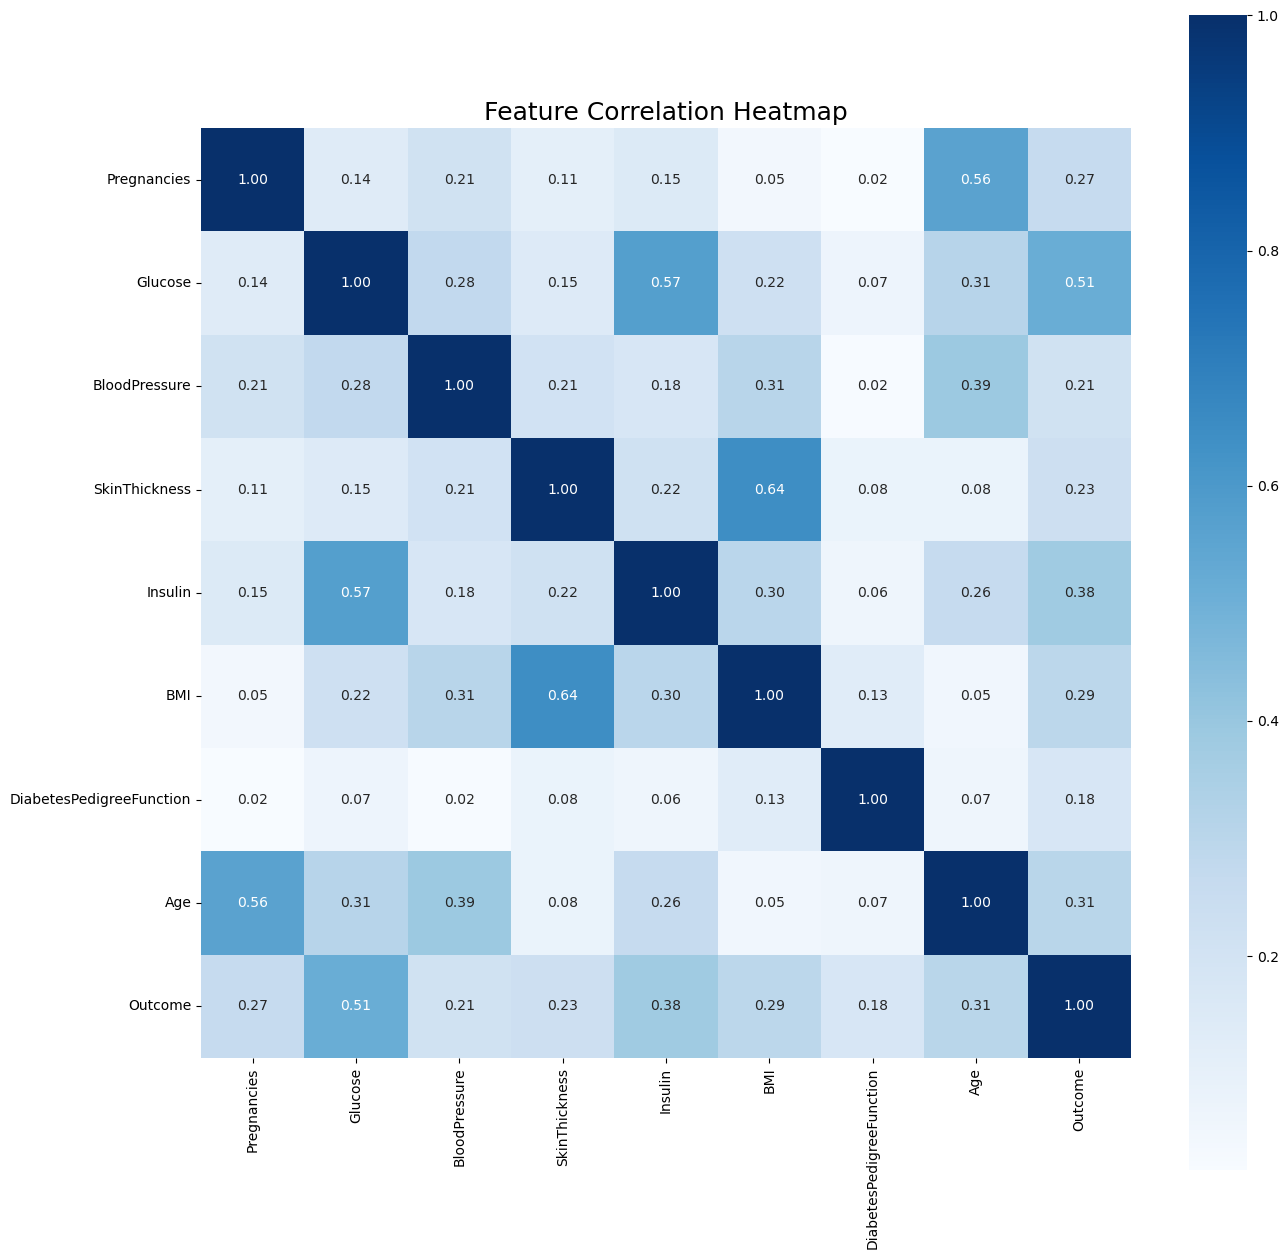

In [50]:
# Visualize the correlation matrix using a heatmap plot
# Setup the plotting environment 
plt.figure(figsize=(15,15))
print('\nVisualizing the correlation of the dataset:\n')

# Heatmap plot for correlation
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Blues')

# Aesthetic aspects of the plot
plt.title('Feature Correlation Heatmap', fontsize=18)  
plt.show() 

In [51]:
# Get and print correlation of 'Outcome' with other features
print("\nThe correlation of 'Outcome' with other features:\n")
outcome_corr = df_final_adp.corr()['Outcome'].sort_values(ascending=False)  
print(outcome_corr) 


The correlation of 'Outcome' with other features:

Outcome                     1.000000
Glucose                     0.514122
Insulin                     0.378670
Age                         0.305336
BMI                         0.294145
Pregnancies                 0.266621
SkinThickness               0.231655
BloodPressure               0.212777
DiabetesPedigreeFunction    0.177552
Name: Outcome, dtype: float64


In [52]:
# Select features with correlation >= 0.2 with 'Outcome'
significant_features_fm = outcome_corr[outcome_corr.abs() >= 0.2].index.tolist()  # Apply abs() to consider both positive and negative correlations  

# Remove 'Outcome' from the list of significant features
significant_features_fm = [feature for feature in significant_features_fm if feature != 'Outcome']           
print("\nChoosing features that have correlation >= 0.2':\n", significant_features_fm) 


Choosing features that have correlation >= 0.2':
 ['Glucose', 'Insulin', 'Age', 'BMI', 'Pregnancies', 'SkinThickness', 'BloodPressure']


In [53]:
# Validate filter method
# Separate features and target variable
x_fm = df_final_adp[significant_features_fm].drop(columns=['Outcome'], errors='ignore')               # Features 
y_fm = df_final_adp['Outcome']                                                                        # Target variable

# Split the dataset into training and testing sets (80/20) with random state  
X_train, X_test, y_train, y_test = train_test_split(x_fm, y_fm, test_size=0.2, random_state=42, stratify=y_fm)

In [54]:
# Initialize the KNN classifier
clf_fm = KNeighborsClassifier(n_neighbors=1)  

# Perform cross-validation to check accuracy after filter method 
accuracy_fm = np.mean(cross_val_score(clf_fm, X_train, y_train, scoring='accuracy', cv=10))  
print(f"\nCross-validated accuracy after filter method: {accuracy_fm:.4f}") 


Cross-validated accuracy after filter method: 0.8329


<div id="rfe"> 
    <h2>Recursive Feature Elimination (RFE)</h2>    
</div>

In [55]:
# Separate features and target variable  
X = df_final_adp.drop('Outcome', axis=1)           # Features
y = df_final_adp['Outcome']                        # Target variable

# Split the dataset into training and testing sets (80/20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
# Initialize the Logistic Regression model  
reg_model = LogisticRegression(max_iter=1000)                   # Added max_iter for convergence if needed  

# Initialize and fit RFE  
rfe = RFE(estimator=reg_model, n_features_to_select=6)          # Select 6 features  

# Fit the model to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=6)

In [57]:
# Get the selected features  
significant_features_rfe = X.columns[rfe.support_]  
print("Selected features using RFE:")  
print(significant_features_rfe.tolist()) 

Selected features using RFE:
['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


In [58]:
# Validate RFE
# Separate features and target variable
X_rfe = df_final_adp[significant_features_rfe]           # Features
y_rfe = df_final_adp['Outcome']                          # Target variable

In [59]:
# Initialize the KNN classifier
clf_rfe = KNeighborsClassifier(n_neighbors = 1)

# Perform cross-validation to check accuracy after RFE
accuracy_rfe = np.mean(cross_val_score(clf_rfe, X_rfe, y_rfe, scoring='accuracy', cv=10))
print(f"\nCross-validated accuracy after RFE: {accuracy_rfe:.4f}")


Cross-validated accuracy after RFE: 0.8458


<div id="pca"> 
	<h2>Principal Component Analysis (PCA)</h2>    
</div>

In [60]:
# Separate features and target variable
X = df_final_adp.drop('Outcome', axis = 1)             # Features
Y = df_final_adp['Outcome']                            # Target variable

In [61]:
# Using PCA to capture 95% of the variance in the dataset
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
print("\nThe shape of dataset before PCA -->", X.shape)
print("\nThe shape of dataset after PCA -->", X_pca.shape)


The shape of dataset before PCA --> (830, 8)

The shape of dataset after PCA --> (830, 7)


In [62]:
# Explain how much variance each principal component explains  
print("\nExplained variance ratio for each component:", pca.explained_variance_ratio_)  
print("\nNumber of components that explain 95% of the variance -->", pca.n_components_)


Explained variance ratio for each component: [0.3232792  0.18114863 0.13920465 0.12187408 0.09501972 0.0525558
 0.04855405]

Number of components that explain 95% of the variance --> 7


In [63]:
# Create a DataFrame for the PCA-transformed features   
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])  
print("\nNew features dataset after using PCA (95%):\n")  
display(X_pca_df)


New features dataset after using PCA (95%):



,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.209645,0.508301,-0.724210,0.343598,0.183359,0.077944,-0.230410
1,0.152544,-0.904492,0.465995,-0.786564,0.306110,1.004383,-1.904204
2,0.401404,-0.997838,0.303815,-0.491292,-1.097628,0.951899,0.035326
3,0.000907,0.805955,0.980022,0.493056,0.252031,0.679500,-0.418031
4,0.639123,-1.896677,-3.135330,-0.861672,1.794370,0.928703,-0.802523
...,...,...,...,...,...,...,...
825,-1.187780,1.343861,-0.496662,-0.837847,-1.090334,-0.441093,0.504902
826,-2.078701,-0.518520,1.783425,-0.830088,-0.184351,0.861541,-0.155780
827,-0.245610,0.211662,0.394051,-0.799871,0.968647,0.030020,-0.173386
828,1.498222,-0.268759,-0.939827,-0.517690,0.524879,-0.442160,-0.207415


In [64]:
# Validate PCA
# Split the data into training and testing sets (80/20)
X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca_df, Y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
clf_pca = KNeighborsClassifier(n_neighbors = 1)

In [65]:
# Perform cross-validation to check accuracy after PCA
accuracy_pca = np.mean(cross_val_score(clf_pca, X_train_pca, Y_train, scoring='accuracy', cv=10))
print(f"\nCross-validated accuracy after PCA: {accuracy_pca:.4f}")


Cross-validated accuracy after PCA: 0.8147


<div id="output"> 
    <h2>Output the results</h2>    
</div>  

In [66]:
# Output the results of different feature selection methods   
print('\nFilter method result:', accuracy_fm)     # Print accuracy score for filter (correlation analysis) method  
print('\nRFE result:', accuracy_rfe)              # Print accuracy score for recursive feature elimination (RFE) method
print('\nPCA result:', accuracy_pca)              # Print accuracy score for principal component analysis (PCA) method


Filter method result: 0.8328810492989597

RFE result: 0.8457831325301205

PCA result: 0.8147218453188604


In [67]:
print('\nUsing features that obtained from Recursive Feature Elimination (RFE) because it had better accuracy \n')


Using features that obtained from Recursive Feature Elimination (RFE) because it had better accuracy 



**Final dataset** after feature selection
<hr>

In [68]:
# Final dataset after feature selection (recursive feature elimination (RFE))
# Extract the names of the selected features 
selected_features = significant_features_rfe.tolist()
print('\nselected features:\n', selected_features)


selected features:
 ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


In [69]:
# Create the final dataframe with the selected features and add the target column
df_final = df_Scaled[selected_features] 
df_final['Outcome'] = df_Scaled['Outcome']

# Display the final dataframe
print("Final dataframe with selected features and target column:") 
display(df_final)

Final dataframe with selected features and target column:


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,0.673824,0.991351,0.694306,1.653288,0.247974,0.788892,1
1,-0.860651,-1.170674,0.088124,-0.768397,-0.840853,-0.311759,0
2,1.287615,2.192476,-0.688185,1.007732,-1.354158,0.968346,1
3,-0.860651,-1.033403,-0.518059,-0.526821,-0.607533,-1.045526,0
4,0.366929,-0.106820,-0.635478,0.045677,-0.996400,-0.909939,0
...,...,...,...,...,...,...,...
634,1.901405,-0.621588,2.007702,0.744915,0.139091,-1.029575,0
635,-0.553756,0.099087,-0.113937,1.419981,0.745724,-0.355625,0
636,0.366929,0.064769,-0.518059,-0.260644,-0.903072,-0.734473,0
637,-0.860651,0.236358,-1.103404,1.332257,-0.296440,-0.319735,1


<hr>
<div id="classification"> 
    <h2>Classification</h2>    
</div>
<div>
    <ol>
        <li><a href="#nb">Naive Bayes</a></li>   
    </ol>
</div>
<br>

In [70]:
# Separate features and target variable  
X = df_final.drop('Outcome', axis=1)              # Features  
y = df_final['Outcome']                           # Target variable

# Split the dataset into training and testing sets (80/20) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
print('\nThe shape of the X_train dataset -->', X_train.shape)
print('\nThe shape of the Y_train dataset -->', Y_train.shape)
print('\nThe shape of the X_test dataset -->', X_test.shape)
print('\nThe shape of the Y_test dataset -->', Y_test.shape)
print('\n')


The shape of the X_train dataset --> (511, 6)

The shape of the Y_train dataset --> (511,)

The shape of the X_test dataset --> (128, 6)

The shape of the Y_test dataset --> (128,)




<hr>
<div id="nb">   
    <h2>Naive Bayes</h2>    
</div>  
<div>  
    <ol>  
        <li>  
            <a href="#valid">Validating</a>  
            <ol>   
                <li><a href="#holdout">Holdout</a></li>   
                <li><a href="#rrs">Repeated Random Sampling</a></li>
                <li><a href="#cv">Cross-validation</a></li>  
                <li><a href="#loocv">Leave-one-out Cross-validation</a></li>    
            </ol>  
        </li>  
        <li><a href="#test">Testing</a></li>  
        <li><a href="#roc">ROC plot and AUC score</a></li> 
        <li><a href="#output">Output the results</a></li> 
    </ol>  
</div>  
<br>  

<div id="holdout"> 
    <h2>Holdout</h2>    
</div>

In [72]:
# Holdout 
# Split the dataset into training and validating sets (80/20)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf_nb_h = GaussianNB()

# Fit the model to the training data
clf_nb_h.fit(x_train, y_train)

GaussianNB()

In [73]:
# Predict the labels for the validating data
y_predict = clf_nb_h.predict(x_val)

# Evaluate model performance
print('\nHoldout result:')
accuracy_score_holdout = accuracy_score(y_val, y_predict)
print('\nAccuracy  -->', accuracy_score_holdout)
print('\n')


Holdout result:

Accuracy  --> 0.7766990291262136




<div id="rrs"> 
    <h2>Repeated Random Sampling</h2>    
</div>

In [74]:
# Repeated random sampling

Accuracy = []             # Initialize a list to store accuracy results
num_repeats = 10          # Number of times to repeat random sampling

# Perform repeated random sampling
for i in range(num_repeats):
    
    # Split the dataset into training and validating sets (80/20)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

    # Train a Naive Bayes classifier
    clf_nb_rrs = GaussianNB()

    # Fit the model to the training data
    clf_nb_rrs.fit(x_train, y_train)

    # Predict the labels for the validating data
    y_predict = clf_nb_rrs.predict(x_val)
    accuracy_score(y_val, y_predict)
    Accuracy.append(accuracy_score(y_val, y_predict))

In [75]:
# Evaluate model performance        
df_Accuracy = pd.DataFrame(Accuracy, columns=['Accuracy'])
print('\nAccuracy in 10 iterations for different train and validation sets:\n')
display(df_Accuracy)

accuracy_score_rrs = df_Accuracy.Accuracy.mean()
print('\nThe mean of different accuracies for validating the model -->', accuracy_score_rrs)
print('\n')


Accuracy in 10 iterations for different train and validation sets:



,Accuracy
0,0.776699
1,0.776699
2,0.776699
3,0.776699
4,0.776699
5,0.776699
6,0.776699
7,0.776699
8,0.776699
9,0.776699



The mean of different accuracies for validating the model --> 0.7766990291262135




<div id="cv"> 
	<h2>Cross_validation</h2>    
</div>

In [76]:
# Cross_validation
# Split the dataset into training and validating sets (80/20)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf_nb_cv = GaussianNB()

# Fit the model to the training data
clf_nb_cv.fit(x_train, y_train)

GaussianNB()

In [77]:
# Perform cross-validation
CV_scores = cross_val_score(clf_nb_cv, x_train, y_train, cv=10)        # 10-fold cross-validation
CV_score_df = pd.DataFrame(CV_scores, columns = ['Accuracy'])

In [78]:
# Evaluate model performance
print('\nValidating the model with cross-validation:\n')
print('\nCV scores for 10 folds:\n')
display(CV_score_df)

accuracy_score_cv = CV_score_df.Accuracy.mean()
print('\nThe mean of CV scores -->', accuracy_score_cv)
print('\n')


Validating the model with cross-validation:


CV scores for 10 folds:



,Accuracy
0,0.780488
1,0.829268
2,0.780488
3,0.780488
4,0.780488
5,0.829268
6,0.756098
7,0.707317
8,0.850000
9,0.700000



The mean of CV scores --> 0.779390243902439




<div id="loocv"> 
	<h2>Leave-on-out Cross-validation</h2>    
</div>

In [80]:
# Leave-one-out Cross-validation (LOOCV)
# Split the dataset into training and validating sets (80/20)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf_nb_loocv = GaussianNB()

In [81]:
# Perform Leave-one-out Cross-validation
LOOCV = LeaveOneOut()
LOOCV_scores = cross_val_score(clf_nb_loocv, x_train, y_train, cv = LOOCV)
LOOCV_scores_df = pd.DataFrame(LOOCV_scores, columns = ['Accuracy'])

In [82]:
# Evaluate model performance
print('\nValidating the model with Leave-one-out Cross-validation:\n')
print('\nLOOCV scores:\n')
display(LOOCV_scores_df)

accuracy_score_loocv = LOOCV_scores_df.Accuracy.mean()
print('\nThe mean of CV scores -->', accuracy_score_loocv)
print('\n')


Validating the model with Leave-one-out Cross-validation:


LOOCV scores:



,Accuracy
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
403,0.0
404,1.0
405,0.0
406,0.0



The mean of CV scores --> 0.7794117647058824




<div id="test"> 
    <h2>Testing</h2>    
</div>

In [83]:
# Testing
# Train a Naive Bayes classifier
clf_nb = GaussianNB()

# Fit the model to the training data
clf_nb.fit(X_train, Y_train)

# Predict the labels for the testing data
Y_predict = clf_nb.predict(X_test)

In [84]:
# Evaluate model performance
print('\nTesting the model:\n')

accuracy_score_nb_testing = accuracy_score(Y_test, Y_predict)
print('\nAccuracy  -->', accuracy_score_nb_testing)
print('\nRecall or Sensitivity or TPR --->', recall_score(Y_test, Y_predict))
print('\nPrecision -->', precision_score(Y_test, Y_predict))
print('\nF1_score -->', f1_score(Y_test, Y_predict))
print('\n')


Testing the model:


Accuracy  --> 0.78125

Recall or Sensitivity or TPR ---> 0.5555555555555556

Precision --> 0.625

F1_score --> 0.5882352941176471




In [85]:
# Generate and display the classification report
print('\nClassification report:\n', classification_report(Y_test, Y_predict))


Classification report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        92
           1       0.62      0.56      0.59        36

    accuracy                           0.78       128
   macro avg       0.73      0.71      0.72       128
weighted avg       0.77      0.78      0.78       128



In [86]:
# Generate and display the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_predict, Y_test)

# Create a dataframe for the confusion matrix for better visualization
confusion_matrix_dataframe = pd.DataFrame(confusion_matrix, columns = ['benign present', 'malignant present'], 
                                          index = ['test benign', 'test malignant'])
print("\nConfusion matrix:\n")
display(confusion_matrix_dataframe)
print('\n')


Confusion matrix:



,benign present,malignant present
test benign,80,16
test malignant,12,20


<div id="roc"> 
    <h2>ROC plot and AUC score</h2>    
</div>

In [87]:
# ROC  
def plot_roc_curve(y_test, y_pred):  
    
    # Calculate ROC curve  
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)  
    plt.plot(fpr, tpr)  
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate')  
    plt.title('ROC Curve')  
    plt.grid()


AUC score: 0.71256038647343




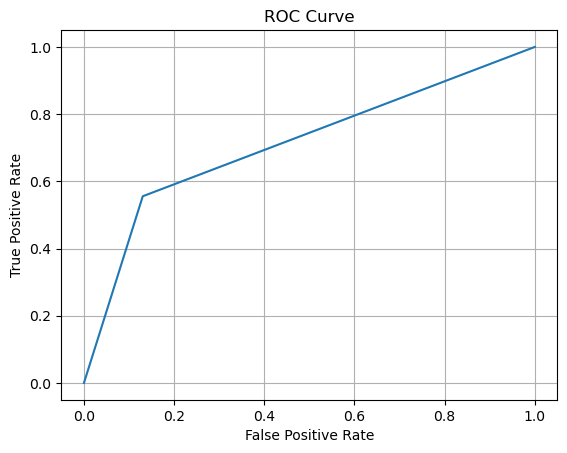

In [88]:
# ROC plot and AUC score  
plot_roc_curve(Y_test, Y_predict)  

# Calculate AUC score  
auc_score = roc_auc_score(Y_test, Y_predict)   
print('\nAUC score:', auc_score)  
print('\n')

<div id="output"> 
    <h2>Output the results</h2>    
</div>

In [89]:
# Output the results of different validation methods and the Naive Bayes testing  
print('\nHoldout result:', accuracy_score_holdout)                       # Print accuracy score for the holdout method  
print('\nRepeated random sampling result:', accuracy_score_rrs)          # Print accuracy score for repeated random sampling method
print('\nCross-validation result:', accuracy_score_cv)                   # Print accuracy score for cross-validation method  
print('\nLeave-one-out Cross-validation result:', accuracy_score_loocv)  # Print accuracy score for leave-one-out cross-validation method  
print('\nNaive Bayes testing result:', accuracy_score_nb_testing)        # Print accuracy score for naive bayes testing  
print('\nAUC score:', auc_score)                                         # Print AUC score for the model


Holdout result: 0.7766990291262136

Repeated random sampling result: 0.7766990291262135

Cross-validation result: 0.779390243902439

Leave-one-out Cross-validation result: 0.7794117647058824

Naive Bayes testing result: 0.78125

AUC score: 0.71256038647343
